<h3>Summary

Records of inpatient and outpatient claims from 138,556 Medicare beneficiaries are analyzed to identify healthcare providers who potentially committed fraud. Detailed claim data as well as beneficiaries' demographic and medical history data are available. 

<h3>1. Introduction:

Healthcare provider fraud is one of the biggest problems facing Medicare, and it contributes to the total Medicare spending growth. Healthcare fraud is an organized crime which involves peers of providers, physicians, beneficiaries acting together to make fraudulent claims.
Rigorous analysis of Medicare data has yielded many physicians who indulge in fraud. They adopt ways in which an ambiguous diagnosis code is used to adopt costliest procedures and drugs. Insurance companies are the most vulnerable institutions impacted. To recoup those losses, insurance companies increase the insurance premiums and as a result healthcare becomes more costly for everyone.
Healthcare fraud and abuse take many forms. Some of the most common types of fraud by providers are: a) Billing for services that were not provided; b) Duplicate submission of a claim for the same service; c) Misrepresenting the service provided; d) Charging for a more complex or expensive service than was actually provided; e) Billing for a covered service when the service actually provided was not covered.

Problem Statement: 
 
We want to identify the potentially fraudulent providers based on the claims that they filed. In addition, we will also discover important variables helpful in detecting the behaviour of those providers. Further, we will study fraudulent patterns in the provider's claims to understand the future behaviour of providers.



Datasets:

The datasets include provider data, beneficiary data, inpatient claims data and outpatient claims data. There are separate training dataset and test dataset.It can be found here : https://www.kaggle.com/rohitrox/healthcare-provider-fraud-detection-analysis

The training provider data include 5410 providers with a binary flag for potential fraud. The training beneficiary data contains 138,556 subjects with 25 variables. The inpatient training data include 31,289 subjects and 40,474 claims with 30 variables. The outpatient training data include 133,980 subjects and 517,737 claims with 27 variables. The test provider data include 1353 providers. The test beneficiary data contains 63,968 subjects. The inpatient test data include 8,351 subjects and 9,551 claims. The outpatient test data include 59,608 subjects and 125,841 claims. 

The beneficiary data variables include ID, date of birth, gender, race, state, county and chronic disease status, inpatient annual reimbursement and deductible amount, and outpatient annual reimbursement and deductible amount. The inpatient dataset variables include beneficiary ID, claim id, claim start/end date, provider, reimbursement amount, admission date, admit diagnosis code,  deductible amount, discharge date, diagnosis code and procedure code. The outpatient dataset variables include beneficiary ID, claim id, claim start/end date, provider, reimbursement amount, admit diagnosis code, deductible amount, diagnosis code, and procedure code. 


Questions of interest:

We will first use the training datasets to identify differential features attributable to potentially fraudulent providers. The following questions will guide the exploratory data analysis:<br>
1) What is the difference in the number of claims submitted annually between the fraudulent providers and the "honest" providers? <br>
2) What is the difference in the claim amounts submitted annually between the fraudulent providers and the "honest" providers? <br>

<h3> 2. Data wrangling 

In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

#display plots inline
%matplotlib inline

In [2]:
#import the raw training datasets: there are four, one with provider information, one with beneficiary data, and two with claim data. 
fraud_tr = pd.read_csv('/Users/zhengzhang/Downloads/healthcare-provider-fraud-detection-analysis/Train-1542865627584.csv')
bene_tr = pd.read_csv('/Users/zhengzhang/Downloads/healthcare-provider-fraud-detection-analysis/Train_Beneficiarydata-1542865627584.csv')
inpatient_tr = pd.read_csv('/Users/zhengzhang/Downloads/healthcare-provider-fraud-detection-analysis/Train_Inpatientdata-1542865627584.csv')
outpatient_tr = pd.read_csv('/Users/zhengzhang/Downloads/healthcare-provider-fraud-detection-analysis/Train_Outpatientdata-1542865627584.csv')

In [60]:
#inspect the provider dataset, there are 5410 providers, 2 variables
fraud_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


In [61]:
#inspect the provider dataset, the first five rows
fraud_tr.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [62]:
#There is no missing data in the provider dataset
fraud_tr.isnull().sum()

Provider          0
PotentialFraud    0
dtype: int64

In [63]:
#inspect the beneficiary dataset, there are 138556 beneficiaries, 25 variables
bene_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [64]:
#inspect the beneficiary dataset, the first five rows
bene_tr.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [65]:
#Check for missing data in the beneficiary dataset, only DOD has missing data
bene_tr.isnull().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

In [66]:
#inspect the inpatient dataset, there are 40474 claims, 30 variables
inpatient_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [67]:
#inspect the inpatient dataset, the first five rows
inpatient_tr.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [68]:
#Check for missing data in the inpatient dataset
inpatient_tr.isnull().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

In [69]:
#inspect the outpatient dataset, there are 517737 claims, 27 variables
outpatient_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [70]:
#inspect the outpatient dataset the first five rows
outpatient_tr.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [71]:
#Check for missing data in the inpatient dataset
outpatient_tr.isnull().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64

<h4> 2a. Handling null values 

1) Provider data (Fraud_tr): No missing data. <br>
2) Beneficiary data (Bene_tr): One variable (date of death) has 1421 non-missing data, which is expected. <br>
3) Inpatient claim data (inpatient_tr): Missing data were observed on physician ID and diagnosis/procedure code variables, we decide to leave as they were. Missing data were found on the variable (deductible amount paid) on 899 claims, we assumed deductible = 0 for those claims. <br>
4) Outpatient claim data (outpatient_tr): Missing data were observed on physician ID and diagnosis/procedure/admit diagnosis code variables, we decide to leave as they were. <br>


In [72]:
#Fill the missing values with 0
inpatient_tr['DeductibleAmtPaid'].fillna(0,inplace=True)
#check whether the missing values are replaced with 0
inpatient_tr.isnull().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid             0
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

<h3> 3. Exploratory data analysis

<h4> 3a. Univariate Analysis

Target variable: Potential Fraud <br>
Question: What percent of providers are potential fraud?<br>
Answer: 506/5410(9.4%) are potential fraud. 

In [73]:
# Check the number of fraud providers: 506
fraud_tr['PotentialFraud'].value_counts()


No     4904
Yes     506
Name: PotentialFraud, dtype: int64

In [74]:
# The percentage of fraud providers: 9.4%
fraud_tr['PotentialFraud'].value_counts(normalize=True)

No     0.90647
Yes    0.09353
Name: PotentialFraud, dtype: float64

Investigate the demographics of beneficiaries<br>
Findings:<br>
1. Gender: 43% are men<br>
2. Race: 84% whilte, will be dichotomized for further analysis<br>
3. Renal Disease: 14% <br>
4. From 52 states and 314 counties<br>
5. Baseline medical condition:<br>
a. Alzheimer: 33.2%<br>
b. Heart failure: 49.4%<br>
c. Kidney disease: 31.2%<br>
d. Cancer: 12.0%<br>
e. Obstructive-Pulmonary: 23.7%<br>
f. Depression: 35.6%<br>
g. Diabetes: 60.2%<br>
h. Ischemic heart disease: 67.6%<br>
i. Osteoporasis: 27.5%<br>
j. Rheumatoidarthritis: 25.7%<br>
k. Stroke: 7.9%


In [75]:
# Check beneficiary gender variable: 59450 men, 79106 women
bene_tr['Gender'].value_counts()

2    79106
1    59450
Name: Gender, dtype: int64

In [76]:
# Check gender variable: 43% men, 57% women
bene_tr['Gender'].value_counts(normalize=True)

2    0.570932
1    0.429068
Name: Gender, dtype: float64

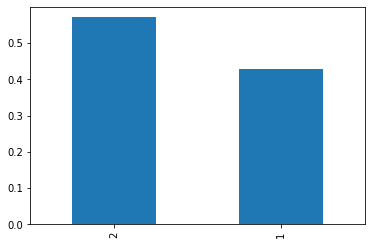

In [77]:
# Pie chart for the race variable
bene_tr['Gender'].value_counts(normalize=True).plot(kind="bar")

In [78]:
# Check beneficiary race variable: white(117057), black (13538), asian(5059), mixed (2902)
bene_tr['Race'].value_counts()

1    117057
2     13538
3      5059
5      2902
Name: Race, dtype: int64

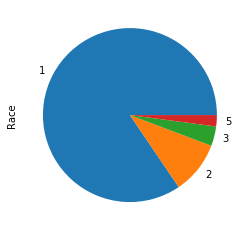

In [79]:
# Pie chart for the race variable
bene_tr['Race'].value_counts(normalize=True).plot(kind="pie")

In [80]:
# Check beneficiary race variable: white(84%), black (10%), asian(3.7%), mixed (2.1%)
bene_tr['Race'].value_counts(normalize=True)

1    0.844835
2    0.097708
3    0.036512
5    0.020945
Name: Race, dtype: float64

In [81]:
# 33% beneficiaries had Alzheimer
bene_tr['ChronicCond_Alzheimer'].value_counts(normalize=True)

2    0.667817
1    0.332183
Name: ChronicCond_Alzheimer, dtype: float64

In [82]:
# 49% beneficiaries had Heart Failure
bene_tr['ChronicCond_Heartfailure'].value_counts(normalize=True)

2    0.506322
1    0.493678
Name: ChronicCond_Heartfailure, dtype: float64

In [83]:
# 31% beneficiaries had Kidney Disease
bene_tr['ChronicCond_KidneyDisease'].value_counts(normalize=True)

2    0.687643
1    0.312357
Name: ChronicCond_KidneyDisease, dtype: float64

In [84]:
# 12% beneficiaries had Cancer
bene_tr['ChronicCond_Cancer'].value_counts(normalize=True)

2    0.880041
1    0.119959
Name: ChronicCond_Cancer, dtype: float64

In [85]:
# 24% beneficiaries had Obstructive Pulmonary Disease
bene_tr['ChronicCond_ObstrPulmonary'].value_counts(normalize=True)

2    0.762847
1    0.237153
Name: ChronicCond_ObstrPulmonary, dtype: float64

In [86]:
# 36% beneficiaries had Depression
bene_tr['ChronicCond_Depression'].value_counts(normalize=True)

2    0.644476
1    0.355524
Name: ChronicCond_Depression, dtype: float64

In [87]:
# 40% beneficiaries had Diabetes
bene_tr['ChronicCond_Diabetes'].value_counts(normalize=True)

1    0.601858
2    0.398142
Name: ChronicCond_Diabetes, dtype: float64

In [88]:
# 32% beneficiaries had Ischemic Heart Disease
bene_tr['ChronicCond_IschemicHeart'].value_counts(normalize=True)

1    0.675857
2    0.324143
Name: ChronicCond_IschemicHeart, dtype: float64

In [89]:
# 27% beneficiaries had Osteoporasis
bene_tr['ChronicCond_Osteoporasis'].value_counts(normalize=True)

2    0.725317
1    0.274683
Name: ChronicCond_Osteoporasis, dtype: float64

In [90]:
# 26% beneficiaries had Rheumatoid Arthritis
bene_tr['ChronicCond_rheumatoidarthritis'].value_counts(normalize=True)

2    0.74318
1    0.25682
Name: ChronicCond_rheumatoidarthritis, dtype: float64

In [91]:
# 7.9% beneficiaries had Stroke
bene_tr['ChronicCond_stroke'].value_counts(normalize=True)

2    0.920942
1    0.079058
Name: ChronicCond_stroke, dtype: float64

Investigating inpatient claims data:<br>
31289 beneficiaries<br>
40474 claims<br>
2092 providers<br>
Maximum claims/beneficiary: 8<br>
Maximum claims/provider: 516


In [92]:
# The beneficiaries had between 1 and 8 inpatient claims.
inpatient_tr['BeneID'].value_counts()

BENE134170    8
BENE119457    7
BENE117116    7
BENE121796    7
BENE62091     7
             ..
BENE24588     1
BENE59144     1
BENE97675     1
BENE71324     1
BENE158163    1
Name: BeneID, Length: 31289, dtype: int64

In [93]:
# The providers had between 1 and 516 inpatient claims.
inpatient_tr['Provider'].value_counts()

PRV52019    516
PRV55462    386
PRV54367    322
PRV53706    282
PRV55209    275
           ... 
PRV52608      1
PRV56174      1
PRV54411      1
PRV52536      1
PRV53289      1
Name: Provider, Length: 2092, dtype: int64

Investigating outpatient claims data:<br>
133,980 beneficiaries<br>
517,737 claims<br>
5012 providers<br>
Maximum claims/beneficiary: 29<br>
Maximum claims/provider: 8240

In [94]:
# The beneficiaries had between 1 and 29 outpatient claims.
outpatient_tr['BeneID'].value_counts()

BENE42721     29
BENE118316    29
BENE63544     27
BENE143400    27
BENE59303     27
              ..
BENE132852     1
BENE82862      1
BENE145385     1
BENE80922      1
BENE58445      1
Name: BeneID, Length: 133980, dtype: int64

In [95]:
# The providers had between 1 and 8240 outpatient claims.
outpatient_tr['Provider'].value_counts()

PRV51459    8240
PRV53797    4739
PRV51574    4444
PRV53918    3588
PRV54895    3433
            ... 
PRV54449       1
PRV57755       1
PRV52794       1
PRV56910       1
PRV52291       1
Name: Provider, Length: 5012, dtype: int64

Investigate medicare coverage:<br>
Part A: 1000 no coverage, 137,389 full 12 month coverage<br>
Part B: 675 no coverage, 136,902 full 12 month coverage

In [96]:
# Medicare Part A: 1000 no coverage, 137,389 full 12 month coverage
bene_tr['NoOfMonths_PartACov'].value_counts()

12    137389
0       1000
6         38
11        28
8         26
10        18
7         16
4         13
5          8
9          7
3          5
2          5
1          3
Name: NoOfMonths_PartACov, dtype: int64

In [97]:
# Medicare Part B: 675 no coverage, 136,902 full 12 month coverage
bene_tr['NoOfMonths_PartBCov'].value_counts()

12    136902
0        675
6        282
10       150
11       143
9        122
8         71
7         63
5         50
4         35
3         27
2         19
1         17
Name: NoOfMonths_PartBCov, dtype: int64

Investigate medical reimbursement and deductible amounts <br>
1. inpatient annual reimbursement: 15 negatives, changed to 0. Maximum 161,470. <br>
2. inpatient annual deductible: max 38,372. <br>
3. outpatient annual reimbursement: 12 negatives, changed to 0. Maximum 102,960. <br>
4. outpatient annual deductible: max 13,840. 

In [98]:
# Check inpatient annual reimbursement: minimum was -8,000, maximum 161,470.
bene_tr['IPAnnualReimbursementAmt'].describe()

count    138556.000000
mean       3660.346502
std        9568.621827
min       -8000.000000
25%           0.000000
50%           0.000000
75%        2280.000000
max      161470.000000
Name: IPAnnualReimbursementAmt, dtype: float64

In [99]:
# Check inpatient annual reimbursement: 15 beneficiaries had negative amount
(bene_tr['IPAnnualReimbursementAmt']<0).value_counts()

False    138541
True         15
Name: IPAnnualReimbursementAmt, dtype: int64

In [100]:
# Check inpatient annual reimbursement: more than half (n=102,511) beneficiaries had zero claim. 
(bene_tr['IPAnnualReimbursementAmt']==0).value_counts()

True     102511
False     36045
Name: IPAnnualReimbursementAmt, dtype: int64

In [101]:
#Change the negative values to 0
ipreimburse=bene_tr['IPAnnualReimbursementAmt']
bene_tr['IPAnnualReimbursementAmt']=pd.Series([z if z>0 else 0 for z in ipreimburse])

In [102]:
# Check inpatient annual deductible: minimum was 0, maximum 38,272.
bene_tr['IPAnnualDeductibleAmt'].describe()

count    138556.000000
mean        399.847296
std         956.175202
min           0.000000
25%           0.000000
50%           0.000000
75%        1068.000000
max       38272.000000
Name: IPAnnualDeductibleAmt, dtype: float64

In [103]:
# Check inpatient annual deductible: more than half(n=102,019) had annual deductible zero. 
(bene_tr['IPAnnualDeductibleAmt']==0).value_counts()

True     102019
False     36537
Name: IPAnnualDeductibleAmt, dtype: int64

In [104]:
# Check outpatient annual reimbursement: minimum was -70, maximum 102,960.
bene_tr['OPAnnualReimbursementAmt'].describe()

count    138556.000000
mean       1298.219348
std        2493.901134
min         -70.000000
25%         170.000000
50%         570.000000
75%        1500.000000
max      102960.000000
Name: OPAnnualReimbursementAmt, dtype: float64

In [105]:
# Check outpatient annual reimbursement: 12 beneficiaries had negative amount
(bene_tr['OPAnnualReimbursementAmt']<0).value_counts()

False    138544
True         12
Name: OPAnnualReimbursementAmt, dtype: int64

In [106]:
# Check outpatient annual reimbursement: majority (n=134,351) beneficiaries had zero claim. 
(bene_tr['OPAnnualReimbursementAmt']==0).value_counts()

False    134351
True       4205
Name: OPAnnualReimbursementAmt, dtype: int64

In [107]:
#Change the negative values to 0
opreimburse=bene_tr['OPAnnualReimbursementAmt']
bene_tr['OPAnnualReimbursementAmt']=pd.Series([z if z>0 else 0 for z in opreimburse])

In [108]:
# Check outpatient annual deductible: minimum was 0, maximum 13,840.
bene_tr['OPAnnualDeductibleAmt'].describe()

count    138556.000000
mean        377.718258
std         645.530187
min           0.000000
25%          40.000000
50%         170.000000
75%         460.000000
max       13840.000000
Name: OPAnnualDeductibleAmt, dtype: float64

In [109]:
# Check inpatient annual deductible: majority(n=124,666) is zero.
(bene_tr['OPAnnualDeductibleAmt']==0).value_counts()

False    124666
True      13890
Name: OPAnnualDeductibleAmt, dtype: int64

Investigate individual claim data


In [110]:
# Check individual inpatient claim amount, median is \$7000, IQR=(4000,12000), an outlier of \$125,000. 
inpatient_tr['InscClaimAmtReimbursed'].describe()

count     40474.000000
mean      10087.884074
std       10303.099402
min           0.000000
25%        4000.000000
50%        7000.000000
75%       12000.000000
max      125000.000000
Name: InscClaimAmtReimbursed, dtype: float64

In [111]:
# Check individual outpatient claim amount, median is \$80, IQR=(40,200). An outlier of \$102,500. 
outpatient_tr['InscClaimAmtReimbursed'].describe()

count    517737.000000
mean        286.334799
std         694.034343
min           0.000000
25%          40.000000
50%          80.000000
75%         200.000000
max      102500.000000
Name: InscClaimAmtReimbursed, dtype: float64

<h3> 4. Targeted Exploratory Data Analysis
<h4> 4a. Distribution of inpatient and outpatient claim amounts

Findings: very skewed distribution, a significant amount of zeros, as well as the presence of extreme outliers. 

Text(0.5, 1.0, 'Inpatient Reimbursement, None-zero only')

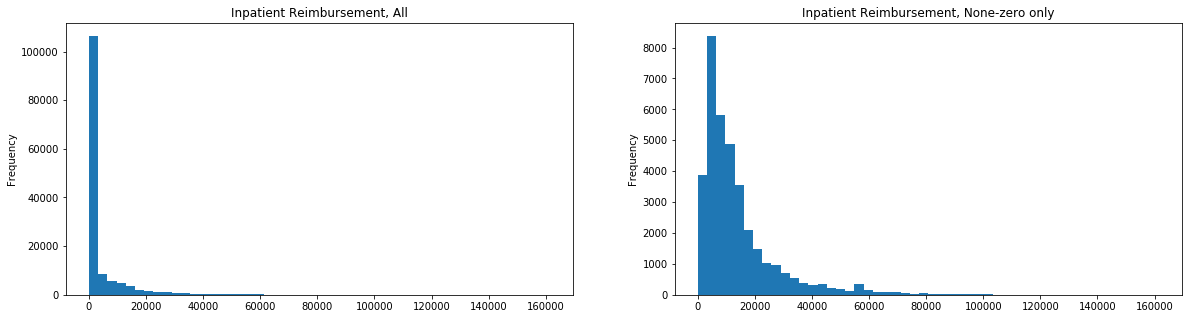

In [112]:
# Histogram of inpatient reimbursement, very skewed distribution with majority of zero. 
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
bene_tr['IPAnnualReimbursementAmt'].plot.hist(bins=50)
plt.title("Inpatient Reimbursement, All")
# Histogram on only none-zero values of the inpatient reimbursement. Still very skewed due to the presence of 
# extreme large values. 
plt.subplot(1,2,2)
bene_tr['IPAnnualReimbursementAmt'][bene_tr['IPAnnualReimbursementAmt']>0].plot.hist(bins=50)
plt.title("Inpatient Reimbursement, None-zero only")

Text(0.5, 1.0, 'Outpatient Reimbursement, <$13000 only')

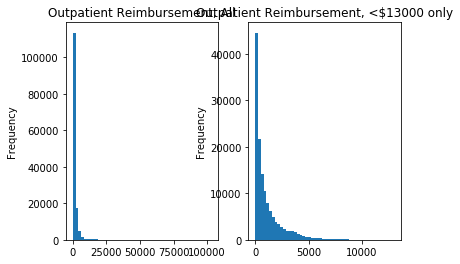

In [113]:
# Histogram of outpatient reimbursement, very skewed distribution with large outliers.
plt.subplot(1,2,1)
bene_tr['OPAnnualReimbursementAmt'].plot.hist(bins=50)
# Histogram of outpatient reimbursement limited to <13000, still very skewed. 
plt.title("Outpatient Reimbursement, All")
plt.subplot(1,2,2)
bene_tr['OPAnnualReimbursementAmt'][bene_tr['OPAnnualReimbursementAmt']<13000].plot.hist(bins=50)
plt.title("Outpatient Reimbursement, <$13000 only")

<h4> 4b. Relationship between the reimbursement and gender

Finding: No significant difference observed between men and women.

Text(0.5, 1.0, 'Outpatient Reimbursement by Gender')

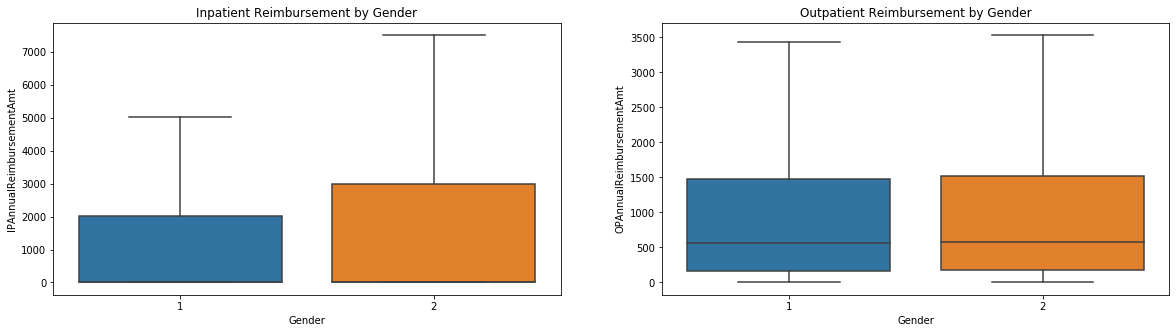

In [114]:
# Boxplot of inpatient reimbursement by gender. No significant differences observed between men and women. 
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="Gender",y="IPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Inpatient Reimbursement by Gender")
# Boxplot of outpatient reimbursement by gender. No significant differences observed between men and women. 
plt.subplot(1,2,2)
sns.boxplot(x="Gender",y="OPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Outpatient Reimbursement by Gender")

<h4> 4c. Relationship between the reimbursement and race

Findings: No significant difference observed across racial groups for outpatient claims. 
    Groups 3 and 5 have almost no inpatient claim. 

Text(0.5, 1.0, 'Outpatient Reimbursement by Race')

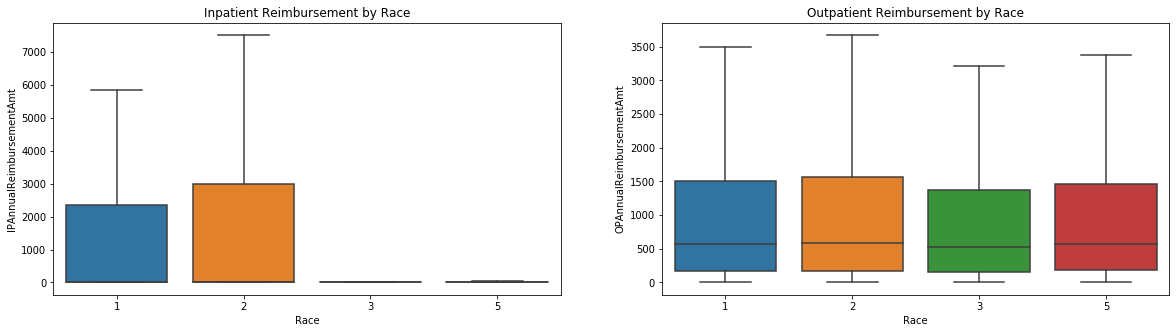

In [115]:
# Boxplot of inpatient reimbursement by race. Only white and black had inpatient claims.
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="Race",y="IPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Inpatient Reimbursement by Race")
# Boxplot of inpatient reimbursement by race. No significant differences observed between races. 
plt.subplot(1,2,2)
sns.boxplot(x="Race",y="OPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Outpatient Reimbursement by Race")

<h4> 4d. Relationship between the reimbursement and co-morbidity
   

Finding: people with comobidity conditions incur almost all inpatient claims.
They tend to have higher outpatient claim amounts. 

Text(0.5, 1.0, 'Outpatient Reimbursement by Alzheimer')

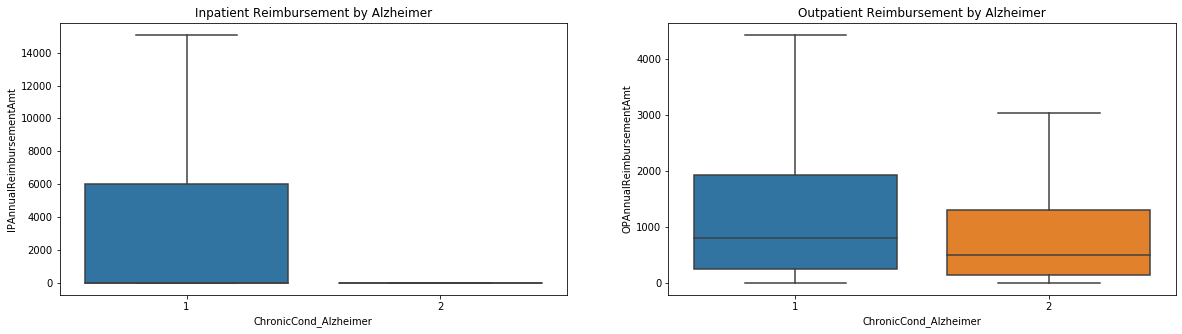

In [116]:
# Boxplot of inpatient reimbursement by Alzheimer status. Alzheimer patients incur all inpatient claims. 
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="ChronicCond_Alzheimer",y="IPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Inpatient Reimbursement by Alzheimer")
# Boxplot of outpatient reimbursement by Alzheimer status. Alzheimer patients have higher outpatient claims. 
plt.subplot(1,2,2)
sns.boxplot(x="ChronicCond_Alzheimer",y="OPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Outpatient Reimbursement by Alzheimer")

Text(0.5, 1.0, 'Outpatient Reimbursement by Heart Failure')

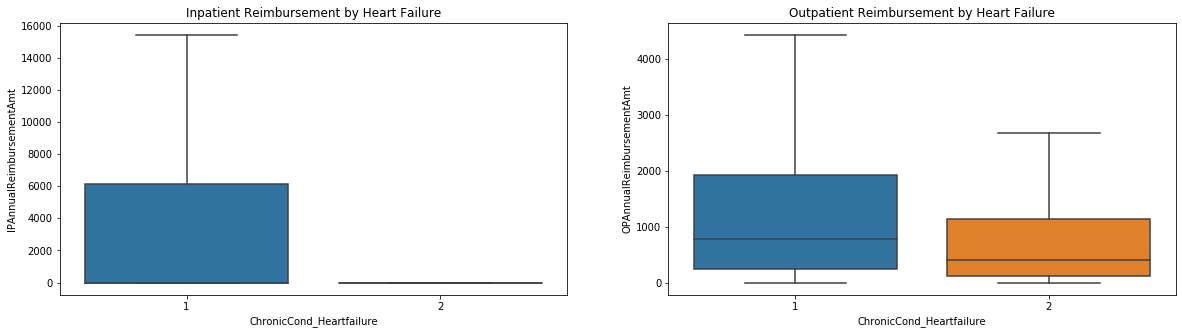

In [117]:
# Boxplot of inpatient reimbursement by Heart Failure status. Heart failure patients incur all inpatient claims. 
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="ChronicCond_Heartfailure",y="IPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Inpatient Reimbursement by Heart Failure")
# Boxplot of outpatient reimbursement by Heart Failure status. Heart Failure patients have higher outpatient claims.
plt.subplot(1,2,2)
sns.boxplot(x="ChronicCond_Heartfailure",y="OPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Outpatient Reimbursement by Heart Failure")

Text(0.5, 1.0, 'Outpatient Reimbursement by Kidney Disease')

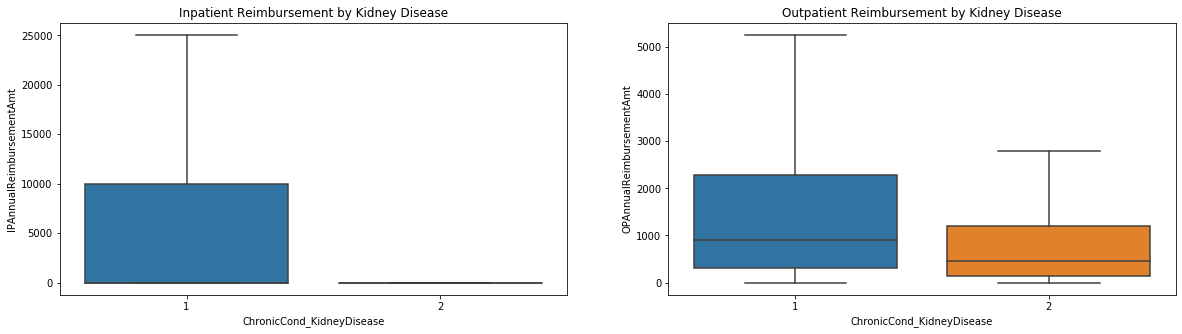

In [118]:
# Boxplot of inpatient reimbursement by Kidney disease status. Kidney Diseasse patients incur all inpatient claims. 
# Boxplot of outpatient reimbursement by Kidney Disease status. Heart Failure patients have higher outpatient claims.
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="ChronicCond_KidneyDisease",y="IPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Inpatient Reimbursement by Kidney Disease")
plt.subplot(1,2,2)
sns.boxplot(x="ChronicCond_KidneyDisease",y="OPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Outpatient Reimbursement by Kidney Disease")

Text(0.5, 1.0, 'Outpatient Reimbursement by Cancer')

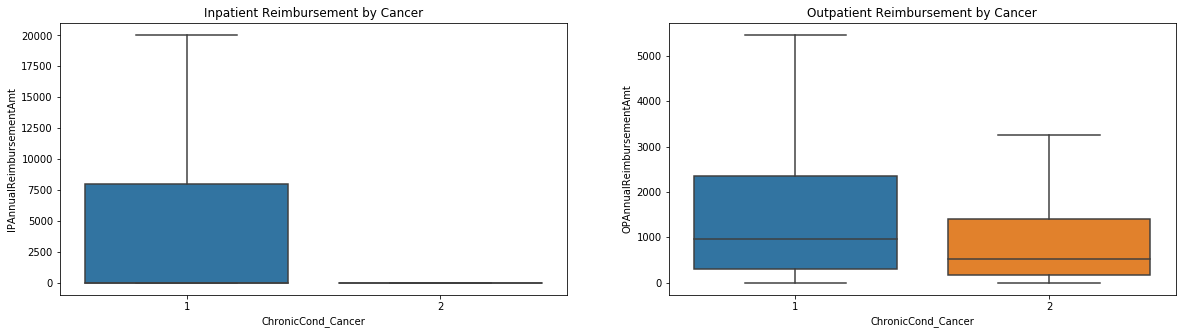

In [119]:
# Boxplot of inpatient reimbursement by Cancer status. Cancer patients incur all inpatient claims. 
# Boxplot of outpatient reimbursement by Cancer status. Cancer patients have higher outpatient claims.
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="ChronicCond_Cancer",y="IPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Inpatient Reimbursement by Cancer")
plt.subplot(1,2,2)
sns.boxplot(x="ChronicCond_Cancer",y="OPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Outpatient Reimbursement by Cancer")

Text(0.5, 1.0, 'Outpatient Reimbursement by ObstrPulmonary')

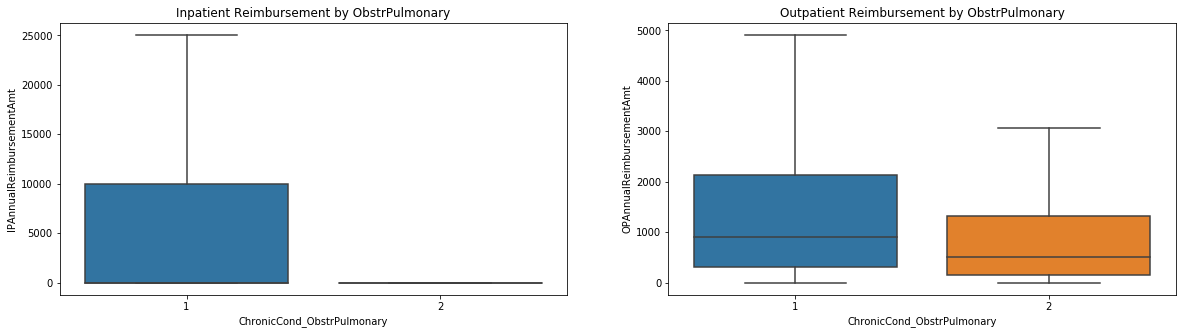

In [120]:
# Boxplot of inpatient reimbursement by Obstructive Pulmonary Disease status. Obstructive Pulmonary Disease patients incur all inpatient claims. 
# Boxplot of outpatient reimbursement by Obstructive Pulmonary Disease status. Obstructive Pulmonary Disease patients have higher outpatient claims.
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="ChronicCond_ObstrPulmonary",y="IPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Inpatient Reimbursement by ObstrPulmonary")
plt.subplot(1,2,2)
sns.boxplot(x="ChronicCond_ObstrPulmonary",y="OPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Outpatient Reimbursement by ObstrPulmonary")

Text(0.5, 1.0, 'Outpatient Reimbursement by Depression')

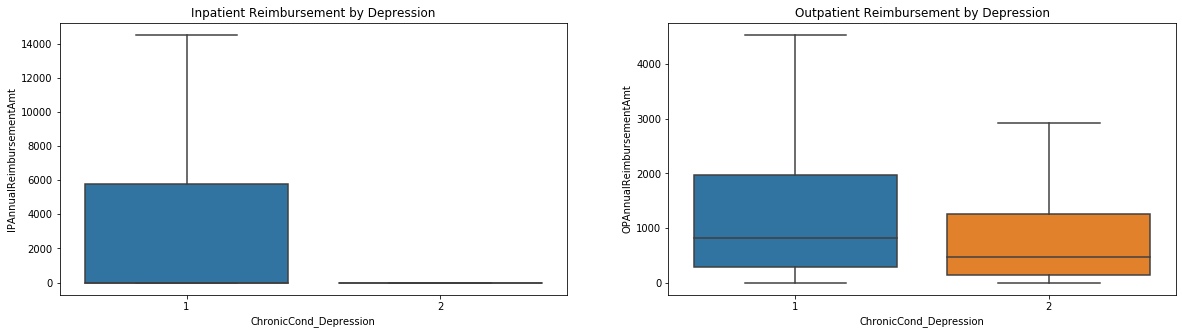

In [121]:
# Boxplot of inpatient reimbursement by Depression status. Depression patients incur all inpatient claims. 
# Boxplot of outpatient reimbursement by Depression status. Depression patients have higher outpatient claims.
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="ChronicCond_Depression",y="IPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Inpatient Reimbursement by Depression")
plt.subplot(1,2,2)
sns.boxplot(x="ChronicCond_Depression",y="OPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Outpatient Reimbursement by Depression")

Text(0.5, 1.0, 'Outpatient Reimbursement by Diabetes')

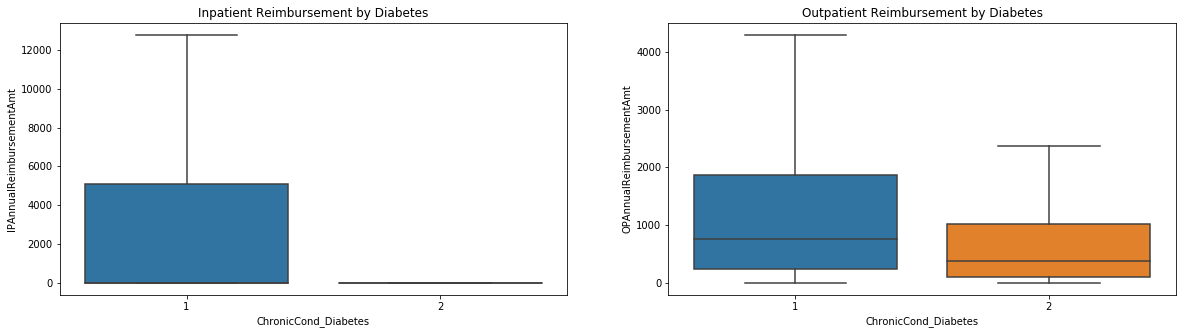

In [122]:
# Boxplot of inpatient reimbursement by Diabetes status. Diabetes patients incur all inpatient claims. 
# Boxplot of outpatient reimbursement by Diabetes status. Diabetes patients have higher outpatient claims.
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="ChronicCond_Diabetes",y="IPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Inpatient Reimbursement by Diabetes")
plt.subplot(1,2,2)
sns.boxplot(x="ChronicCond_Diabetes",y="OPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Outpatient Reimbursement by Diabetes")

Text(0.5, 1.0, 'Outpatient Reimbursement by IschemicHeart')

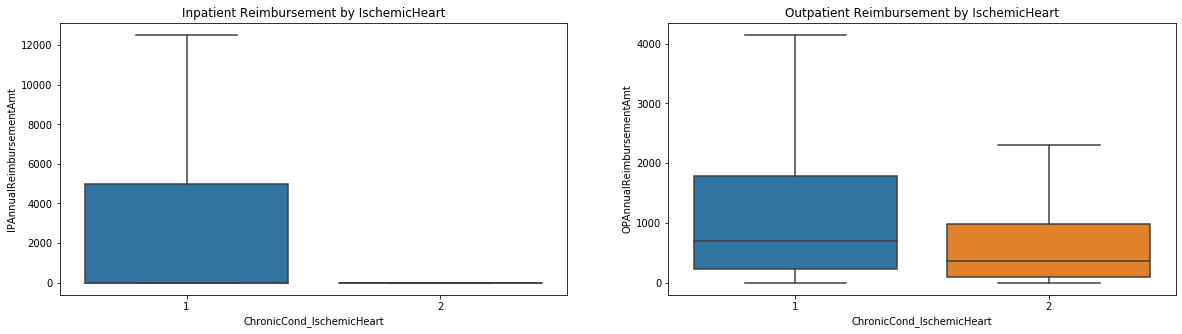

In [123]:
# Boxplot of inpatient reimbursement by Ischemic Heart disease status. Ischemic eart disease patients incur all inpatient claims. 
# Boxplot of outpatient reimbursement by Ischemic Heart disease status. Ischemic Heart disease patients have higher outpatient claims.
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="ChronicCond_IschemicHeart",y="IPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Inpatient Reimbursement by IschemicHeart")
plt.subplot(1,2,2)
sns.boxplot(x="ChronicCond_IschemicHeart",y="OPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Outpatient Reimbursement by IschemicHeart")

Text(0.5, 1.0, 'Outpatient Reimbursement by Osteoporasis')

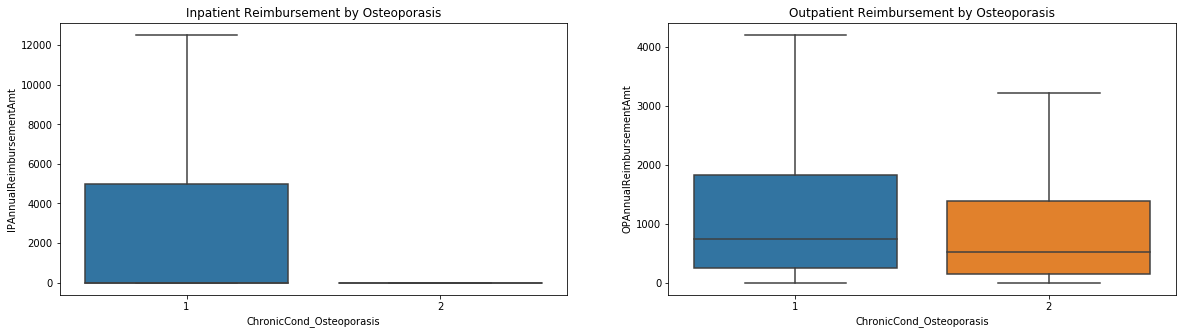

In [124]:
# Boxplot of inpatient reimbursement by Osteoporasis status. Osteoporasis patients incur all inpatient claims. 
# Boxplot of outpatient reimbursement by Osteoporasis status. Osteoporasis patients have higher outpatient claims.
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="ChronicCond_Osteoporasis",y="IPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Inpatient Reimbursement by Osteoporasis")
plt.subplot(1,2,2)
sns.boxplot(x="ChronicCond_Osteoporasis",y="OPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Outpatient Reimbursement by Osteoporasis")

Text(0.5, 1.0, 'Outpatient Reimbursement by Rheumatoidarthritis')

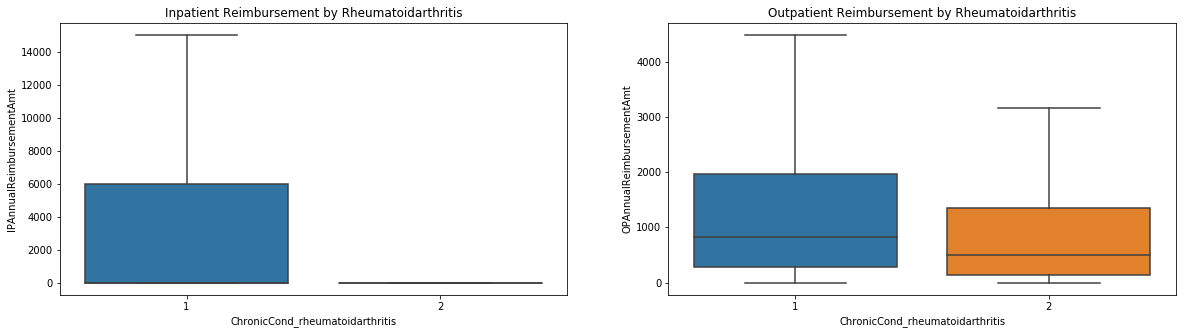

In [125]:
# Boxplot of inpatient reimbursement by Rheumatoid Arthritis status. Rheumatoid Arthritis patients incur all inpatient claims. 
# Boxplot of outpatient reimbursement by Rheumatoid Arthritis status. Rheumatoid Arthritis patients have higher outpatient claims.
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="ChronicCond_rheumatoidarthritis",y="IPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Inpatient Reimbursement by Rheumatoidarthritis")
plt.subplot(1,2,2)
sns.boxplot(x="ChronicCond_rheumatoidarthritis",y="OPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Outpatient Reimbursement by Rheumatoidarthritis")

Text(0.5, 1.0, 'Outpatient Reimbursement by Stroke')

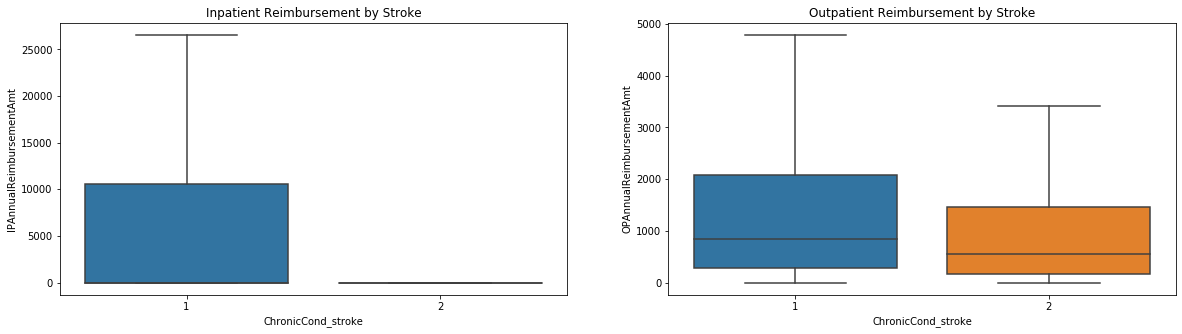

In [126]:
# Boxplot of inpatient reimbursement by Stroke status. Stroke patients incur all inpatient claims. 
# Boxplot of outpatient reimbursement by Stroke status. Stroke patients have higher outpatient claims.
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="ChronicCond_stroke",y="IPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Inpatient Reimbursement by Stroke")
plt.subplot(1,2,2)
sns.boxplot(x="ChronicCond_stroke",y="OPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Outpatient Reimbursement by Stroke")

<h4>4e. Merge datasets to create a Provider dataset
    


1. To calculate the number of claims and the amount of reimbursements each provider has from either inpatient or outpatient claim datasets <br>
2. Merge the above to the provider datasets with the indicator for fraud. <br>
3. Graph the number of claims and the amount of reimbursements by fraud status. 

In [127]:
# Calculate the number of inpatient claims each provider submitted and create a panda dataframe with provider ID
# and the number of inpatient claims
In_Provider=pd.DataFrame([inpatient_tr['Provider'].value_counts().index,inpatient_tr['Provider'].value_counts()]).transpose().rename({0:'Provider',1:'Inpatient_Claim_Number'},axis=1)
In_Provider

,Provider,Inpatient_Claim_Number
0,PRV52019,516
1,PRV55462,386
2,PRV54367,322
3,PRV53706,282
4,PRV55209,275
...,...,...
2087,PRV52608,1
2088,PRV56174,1
2089,PRV54411,1
2090,PRV52536,1


In [128]:
# Calculate the number of outpatient claims each provider submitted and create a panda dataframe with provider ID
# and the number of outpatient claims
Out_Provider=pd.DataFrame([outpatient_tr['Provider'].value_counts().index,outpatient_tr['Provider'].value_counts()]).transpose().rename({0:'Provider',1:'Outpatient_Claim_Number'},axis=1)
Out_Provider

,Provider,Outpatient_Claim_Number
0,PRV51459,8240
1,PRV53797,4739
2,PRV51574,4444
3,PRV53918,3588
4,PRV54895,3433
...,...,...
5007,PRV54449,1
5008,PRV57755,1
5009,PRV52794,1
5010,PRV56910,1


In [129]:
# merge the inpatient and outpatient claims per provider dataframes
provider_claimnumber=pd.merge(In_Provider,Out_Provider,on='Provider',how='outer')

In [130]:
# Calculate total amount of inpatient claims each provider submitted and create a panda dataframe with provider ID
# and total amount of inpatient claims
inreimburse_by_provider=inpatient_tr.groupby('Provider')['InscClaimAmtReimbursed'].sum()
inreimburse_temp1=pd.DataFrame([inreimburse_by_provider.index,inreimburse_by_provider])
inreimburse_temp2=inreimburse_temp1.transpose()
In_Provider_Claim=inreimburse_temp2.rename({0:'Provider',1:'Inpatient_Claim_Amount'},axis=1)
In_Provider_Claim

,Provider,Inpatient_Claim_Amount
0,PRV51001,97000
1,PRV51003,573000
2,PRV51007,19000
3,PRV51008,25000
4,PRV51011,5000
...,...,...
2087,PRV57719,76000
2088,PRV57728,6000
2089,PRV57729,107000
2090,PRV57732,76000


In [131]:
# Calculate total amount of outpatient claims each provider submitted and create a panda dataframe with provider ID
# and total amount of outpatient claims
outreimburse_by_provider=outpatient_tr.groupby('Provider')['InscClaimAmtReimbursed'].sum()
outreimburse_temp1=pd.DataFrame([outreimburse_by_provider.index,outreimburse_by_provider])
outreimburse_temp2=outreimburse_temp1.transpose()
Out_Provider_Claim=outreimburse_temp2.rename({0:'Provider',1:'Outpatient_Claim_Amount'},axis=1)
Out_Provider_Claim

,Provider,Outpatient_Claim_Amount
0,PRV51001,7640
1,PRV51003,32670
2,PRV51004,52170
3,PRV51005,280910
4,PRV51007,14710
...,...,...
5007,PRV57759,10640
5008,PRV57760,4770
5009,PRV57761,18470
5010,PRV57762,1900


In [132]:
# merge the inpatient and outpatient claim amounts per provider dataframes
provider_claimamount=pd.merge(In_Provider_Claim,Out_Provider_Claim,on='Provider',how='outer')
provider_claimamount

,Provider,Inpatient_Claim_Amount,Outpatient_Claim_Amount
0,PRV51001,97000,7640
1,PRV51003,573000,32670
2,PRV51007,19000,14710
3,PRV51008,25000,10630
4,PRV51011,5000,11630
...,...,...,...
5405,PRV57759,NaN,10640
5406,PRV57760,NaN,4770
5407,PRV57761,NaN,18470
5408,PRV57762,NaN,1900


In [133]:
# Merge provider fraud data wth claim number and claim amount datasets
provider_list1=pd.merge(fraud_tr,provider_claimnumber,on='Provider',how='outer')
provider_list1
provider_list2=pd.merge(provider_list1,provider_claimamount,on='Provider',how='outer')
provider_list2

,Provider,PotentialFraud,Inpatient_Claim_Number,Outpatient_Claim_Number,Inpatient_Claim_Amount,Outpatient_Claim_Amount
0,PRV51001,No,5,20,97000,7640
1,PRV51003,Yes,62,70,573000,32670
2,PRV51004,No,NaN,149,NaN,52170
3,PRV51005,Yes,NaN,1165,NaN,280910
4,PRV51007,No,3,69,19000,14710
...,...,...,...,...,...,...
5405,PRV57759,No,NaN,28,NaN,10640
5406,PRV57760,No,NaN,22,NaN,4770
5407,PRV57761,No,NaN,82,NaN,18470
5408,PRV57762,No,NaN,1,NaN,1900


In [134]:
#Rename the dataset to provider_final
#provider_final=provider_list2.fillna(0)
provider_final=provider_list2

Findings: The potentially fraudulent providers had substantially more claims submitted and had been reimbursed substantially more. However, the per claim reimbursement is similar between the two groups of providers. 

Text(0.5, 1.0, 'Number of Outpatient Claims')

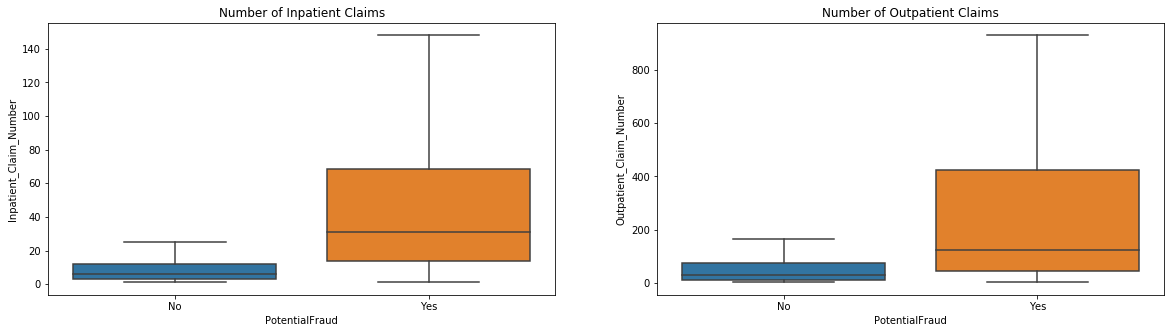

In [135]:
# plot boxplots to compare the number of inpatient and outpatients claims between the providers that are 
# fraudulent and those who are not. The potentially fraudulent providers had substantially more claims submitted than 
# the others
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="PotentialFraud",y="Inpatient_Claim_Number",data=provider_final,showfliers=False)
plt.title("Number of Inpatient Claims")
plt.subplot(1,2,2)
sns.boxplot(x="PotentialFraud",y="Outpatient_Claim_Number",data=provider_final,showfliers=False)
plt.title("Number of Outpatient Claims")

Text(0.5, 1.0, 'Amount of Outpatient Claims')

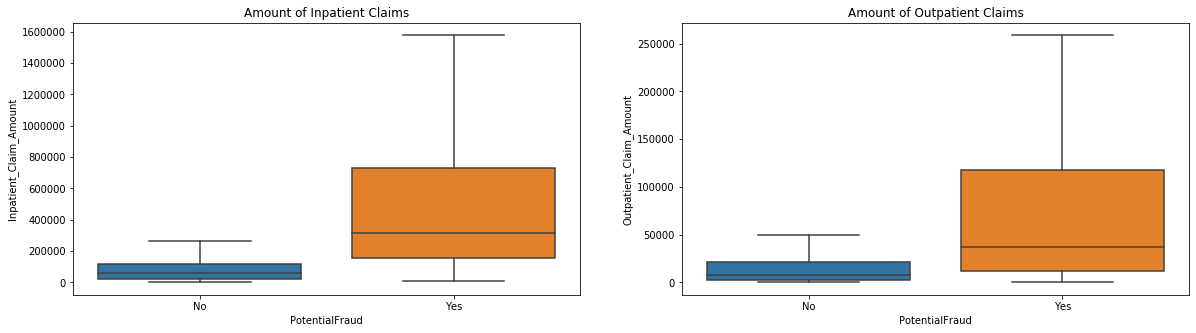

In [136]:
# plot boxplots to compare the total amounts of inpatient and outpatients claims between the providers that are 
# fraudulent and those who are not. The potentially fraudulent providers had substantially higher reimbursements than 
# the others
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="PotentialFraud",y="Inpatient_Claim_Amount",data=provider_final,showfliers=False)
plt.title("Amount of Inpatient Claims")
plt.subplot(1,2,2)
sns.boxplot(x="PotentialFraud",y="Outpatient_Claim_Amount",data=provider_final,showfliers=False)
plt.title("Amount of Outpatient Claims")

In [137]:
#Calculate the inpatient reimbursement per claim 
provider_list2['Inpatient_Perclaim_Amount']=provider_list2['Inpatient_Claim_Amount']/provider_list2['Inpatient_Claim_Number']

In [138]:
#Calculate the outpatient reimbursement per claim 
provider_list2['Outpatient_Perclaim_Amount']=provider_list2['Outpatient_Claim_Amount']/provider_list2['Outpatient_Claim_Number']

In [139]:
#inspect the final provider dataset
provider_list2

,Provider,PotentialFraud,Inpatient_Claim_Number,Outpatient_Claim_Number,Inpatient_Claim_Amount,Outpatient_Claim_Amount,Inpatient_Perclaim_Amount,Outpatient_Perclaim_Amount
0,PRV51001,No,5,20,97000,7640,19400,382
1,PRV51003,Yes,62,70,573000,32670,9241.94,466.714
2,PRV51004,No,NaN,149,NaN,52170,NaN,350.134
3,PRV51005,Yes,NaN,1165,NaN,280910,NaN,241.124
4,PRV51007,No,3,69,19000,14710,6333.33,213.188
...,...,...,...,...,...,...,...,...
5405,PRV57759,No,NaN,28,NaN,10640,NaN,380
5406,PRV57760,No,NaN,22,NaN,4770,NaN,216.818
5407,PRV57761,No,NaN,82,NaN,18470,NaN,225.244
5408,PRV57762,No,NaN,1,NaN,1900,NaN,1900


Text(0.5, 1.0, 'Outpatient Amount Per Claim')

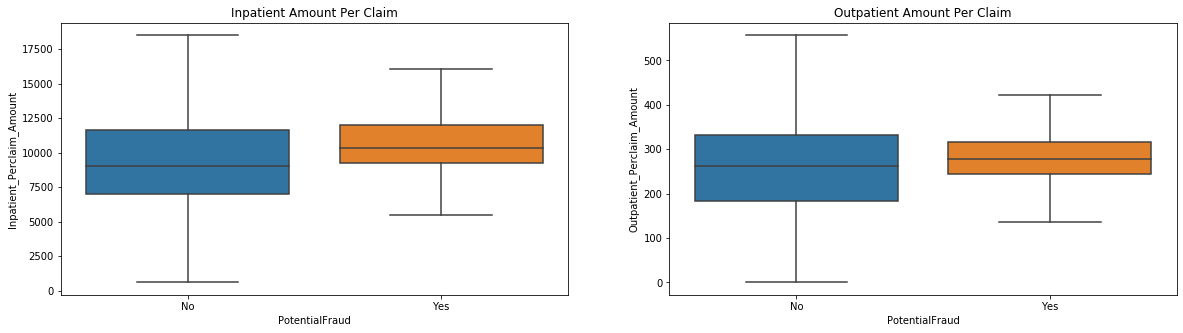

In [140]:
#Plot boxplots to compare the per claim reimbursements between the fraudulent providers and those who are not, 
#They look similar
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="PotentialFraud",y="Inpatient_Perclaim_Amount",data=provider_list2,showfliers=False)
plt.title("Inpatient Amount Per Claim")
plt.subplot(1,2,2)
sns.boxplot(x="PotentialFraud",y="Outpatient_Perclaim_Amount",data=provider_list2,showfliers=False)
plt.title("Outpatient Amount Per Claim")

<h3> Statistical Data Analysis

We are comparing the annual reimbursement of inpatient and outpatient visits between the following categories:
1.  Gender
2.  Chronic Conditions: 
2a. Alzheimer
2b. Heart Failure
2c. Kidney Disease
2d. Cancer
2e. Obstructive Pulmonary Disease
2f. Depression
2g. Diabetes
2h. Ischemic Heart Disease
2i. Osteoporasis
2j. Rheumatoidarthritis
2k. Stroke

In [141]:
import scipy.stats as sp

Question: Is there a difference of inpatient claims between men and women? 
              H0: There is no difference; H1: There is difference <br>
Answer: we used 2 sample t-test to test this hypothesis, p=0.51, so we don't reject the null hypothesis. <br>

In [142]:
# Calculate the mean inpatient reimbursement for men and women and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.Gender==1]))
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.Gender==2]))
sp.ttest_ind(bene_tr.IPAnnualReimbursementAmt[bene_tr.Gender==1],bene_tr.IPAnnualReimbursementAmt[bene_tr.Gender==2])

3640.688814129521
3675.2864510909412


Ttest_indResult(statistic=-0.6661422276840568, pvalue=0.505321304704989)

Question: Is there a difference of outpatient claims between men and women? 
              H0: There is no difference; H1: There is difference <br>
Answer: we used 2 sample t-test to test this hypothesis, p=0.009, so we will reject the null hypothesis and conclude there is significant difference of outpatient claim amount between men and women. However, the difference is between 1277.91 and 1313.49 dollars with a difference of 35.58 dollars. <br>

In [143]:
# Calculate the mean outpatient reimbursement for men and women and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.Gender==1]))
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.Gender==2]))
sp.ttest_ind(bene_tr.OPAnnualReimbursementAmt[bene_tr.Gender==1],bene_tr.OPAnnualReimbursementAmt[bene_tr.Gender==2])

1277.909503784693
1313.4884838065382


Ttest_indResult(statistic=-2.628402072235095, pvalue=0.008579651170132586)

Question: Is there a difference of inpatient claims between with Alzheimer and without? H0: There is no difference; H1: There is difference <br>
Answer: The mean inpatient claim for Alzheimer patient is 5371 dollars, and 2809 dollars for non-Alzheimer patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of inpatient claim amount for patient with Alzheimers. 

In [144]:
# Calculate the mean inpatient reimbursement for patients with Alzheimer's and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Alzheimer==1]))
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Alzheimer==2]))
sp.ttest_ind(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Alzheimer==1],bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Alzheimer==2])

5371.234302350846
2809.4642818545335


Ttest_indResult(statistic=47.31543524464032, pvalue=0.0)

Question: Is there a difference of outpatient claims between with Alzheimer and without? H0: There is no difference; H1: There is difference <br>
Answer: The mean inpatient claim for Alzheimer patient is 1623 dollars, and 1136 dollars for non-Alzheimer patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of outpatient claim amount for patient with Alzheimers. 

In [145]:
# Calculate the mean outpatient reimbursement for patients with Alzheimer's and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Alzheimer==1]))
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Alzheimer==2]))
sp.ttest_ind(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Alzheimer==1],bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Alzheimer==2])

1623.467387998088
1136.4403977088512


Ttest_indResult(statistic=34.38331255230874, pvalue=5.520428938725289e-258)

Question: Is there a difference of inpatient claims between with Heart failure and without? H0: There is no difference; H1: There is difference
Answer: The mean inpatient claim for heart failure patient is 5422 dollars, and 1943 dollars for non-heart failure patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of inpatient claim amount for patient with heart failures.

In [146]:
# Calculate the mean inpatient reimbursement for patients with Heart Failure and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Heartfailure==1]))
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Heartfailure==2]))
sp.ttest_ind(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Heartfailure==1],bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Heartfailure==2])

5421.863980585363
1943.0085241041138


Ttest_indResult(statistic=68.8069277099246, pvalue=0.0)

Question: Is there a difference of outpatient claims between with Heart failure and without? H0: There is no difference; H1: There is difference
Answer: The mean outpatient claim for heart failure patient is 1671 dollars, and 935 dollars for non-heart failure patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of outpatient claim amount for patient with heart failures.

In [147]:
# Calculate the mean outpatient reimbursement for patients with Heart Failure and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Heartfailure==1]))
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Heartfailure==2]))
sp.ttest_ind(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Heartfailure==1],bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Heartfailure==2])

1670.7223472997866
935.0256578384697


Ttest_indResult(statistic=55.506255911154845, pvalue=0.0)

Question: Is there a difference of inpatient claims between with kidney disease and without? H0: There is no difference; H1: There is difference
Answer: The mean inpatient claim for kidney disease patient is 7501 dollars, and 1916 dollars for non-kidney disease patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of inpatient claim amount for patient with kidney disease.

In [148]:
# Calculate the mean inpatient reimbursement for patients with Kidney Disease and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_KidneyDisease==1]))
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_KidneyDisease==2]))
sp.ttest_ind(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_KidneyDisease==1],bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_KidneyDisease==2])

7500.779823933085
1915.9913725243239


Ttest_indResult(statistic=104.58724405263341, pvalue=0.0)

Question: Is there a difference of outpatient claims between with kidney disease and without? H0: There is no difference; H1: There is difference
Answer: The mean outpatient claim for kidney disease patient is 2062 dollars, and 951 dollars for non-kidney disease patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of outpatient claim amount for patient with kidney disease.

In [149]:
# Calculate the mean outpatient reimbursement for patients with Kidney Disease and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_KidneyDisease==1]))
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_KidneyDisease==2]))
sp.ttest_ind(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_KidneyDisease==1],bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_KidneyDisease==2])

2061.6090944800017
951.4590089948256


Ttest_indResult(statistic=78.48124407662134, pvalue=0.0)

Question: Is there a difference of inpatient claims between with cancer and without? H0: There is no difference; H1: There is difference
Answer: The mean inpatient claim for cancer patient is 6068 dollars, and 3332 dollars for non-cancer patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of inpatient claim amount for patient with cancer.

In [150]:
# Calculate the mean inpatient reimbursement for patients with Cancer and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Cancer==1]))
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Cancer==2]))
sp.ttest_ind(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Cancer==1],bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Cancer==2])

6068.013356597076
3332.2648132201584


Ttest_indResult(statistic=34.72883282548054, pvalue=3.949885798545562e-263)

Question: Is there a difference of outpatient claims between with cancer and without? H0: There is no difference; H1: There is difference
Answer: The mean outpatient claim for cancer patient is 1788 dollars, and 1231 dollars for non-cancer patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of outpatient claim amount for patient with cancer.

In [151]:
# Calculate the mean outpatient reimbursement for patients with Cancer and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Cancer==1]))
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Cancer==2]))
sp.ttest_ind(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Cancer==1],bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Cancer==2])

1788.427892425245
1231.402632550129


Ttest_indResult(statistic=27.08451998596713, pvalue=3.953773456549292e-161)

Question: Is there a difference of inpatient claims between with obstructive pulmonary disease and without? H0: There is no difference; H1: There is difference
Answer: The mean inpatient claim for obstructive pulmonary disease patient is 7362 dollars, and 2510 dollars for non-obstructive pulmonary disease patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of inpatient claim amount for patient with obstructive pulmonary disease.

In [152]:
# Calculate the mean inpatient reimbursement for patients with Obstructive Pulmonary Disease and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_ObstrPulmonary==1]))
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_ObstrPulmonary==2]))
sp.ttest_ind(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_ObstrPulmonary==1],bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_ObstrPulmonary==2])

7362.034145896101
2509.6935580007002


Ttest_indResult(statistic=82.22315367518055, pvalue=0.0)

Question: Is there a difference of outpatient claims between with obstructive pulmonary disease and without? H0: There is no difference; H1: There is difference
Answer: The mean outpatient claim for obstructive pulmonary disease patient is 1811 dollars, and 1139 dollars for non-obstructive pulmonary disease patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of outpatient claim amount for patient with obstructive pulmonary disease.

In [153]:
# Calculate the mean outpatient reimbursement for patients with Obstructive Pulmonary Disease and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_ObstrPulmonary==1]))
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_ObstrPulmonary==2]))
sp.ttest_ind(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_ObstrPulmonary==1],bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_ObstrPulmonary==2])

1810.8703855869016
1138.8511499853355


Ttest_indResult(statistic=42.945579769620785, pvalue=0.0)

Question: Is there a difference of inpatient claims between with depression and without? H0: There is no difference; H1: There is difference
Answer: The mean inpatient claim for depression patient is 5022 dollars, and 2909 dollars for non-depression patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of inpatient claim amount for patient with depression.

In [154]:
# Calculate the mean inpatient reimbursement for patients with Depression and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Depression==1]))
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Depression==2]))
sp.ttest_ind(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Depression==1],bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Depression==2])

5022.232846122614
2909.211722809532


Ttest_indResult(statistic=39.56819237829831, pvalue=0.0)

Question: Is there a difference of outpatient claims between with depression and without? H0: There is no difference; H1: There is difference
Answer: The mean outpatient claim for depression patient is 1604 dollars, and 1130 dollars for non-depression patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of outpatient claim amount for patient with depression.

In [155]:
# Calculate the mean outpatient reimbursement for patients with Depression and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Depression==1]))
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Depression==2]))
sp.ttest_ind(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Depression==1],bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Depression==2])

1603.8729192042224
1129.6111807919729


Ttest_indResult(statistic=34.02475155980051, pvalue=1.0670121225126599e-252)

Question: Is there a difference of inpatient claims between with diabetes and without? H0: There is no difference; H1: There is difference
Answer: The mean inpatient claim for diabetes patient is 4871 dollars, and 1831 dollars for non-diabetes patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of inpatient claim amount for patient with diabetes.

In [156]:
# Calculate the mean inpatient reimbursement for patients with Diabetes and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Diabetes==1]))
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Diabetes==2]))
sp.ttest_ind(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Diabetes==1],bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Diabetes==2])

4870.745644014342
1830.867579080939


Ttest_indResult(statistic=58.60074196933711, pvalue=0.0)

Question: Is there a difference of outpatient claims between with diabetes and without? H0: There is no difference; H1: There is difference
Answer: The mean outpatient claim for diabetes patient is 1607 dollars, and 831 dollars for non-diabetes patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of outpatient claim amount for patient with diabetes.

In [157]:
# Calculate the mean outpatient reimbursement for patients with Diabetes and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Diabetes==1]))
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Diabetes==2]))
sp.ttest_ind(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Diabetes==1],bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Diabetes==2])

1607.2627741602812
831.0575546089005


Ttest_indResult(statistic=57.381890854850816, pvalue=0.0)

Question: Is there a difference of inpatient claims between with ischemic heart disease and without? H0: There is no difference; H1: There is difference
Answer: The mean inpatient claim for ischemic heart patient is 4698 dollars, and 1497 dollars for non-ischemic heart patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of inpatient claim amount for patient with ischemic heart.

In [158]:
# Calculate the mean inpatient reimbursement for patients with Ischemic Heart Disease and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_IschemicHeart==1]))
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_IschemicHeart==2]))
sp.ttest_ind(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_IschemicHeart==1],bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_IschemicHeart==2])

4697.77967622058
1497.5347345920911


Ttest_indResult(statistic=58.997176886448116, pvalue=0.0)

Question: Is there a difference of outpatient claims between with ischemic heart disease and without? H0: There is no difference; H1: There is difference
Answer: The mean outpatient claim for ischemic heart patient is 1521 dollars, and 833 dollars for non-ischemic heart patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of outpatient claim amount for patient with ischemic heart.

In [159]:
# Calculate the mean outpatient reimbursement for patients with Ischemic Heart Disease and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_IschemicHeart==1]))
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_IschemicHeart==2]))
sp.ttest_ind(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_IschemicHeart==1],bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_IschemicHeart==2])

1521.0811157148348
833.5504987531172


Ttest_indResult(statistic=48.435752752509465, pvalue=0.0)

Question: Is there a difference of inpatient claims between with Osteoporasis and without? H0: There is no difference; H1: There is difference
Answer: The mean inpatient claim for osteoporasis patient is 4608 dollars, and 3301 dollars for non-osteoporasis patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of inpatient claim amount for patient with osteoporasis.

In [160]:
# Calculate the mean inpatient reimbursement for patients with Osteoporasis and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Osteoporasis==1]))
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Osteoporasis==2]))
sp.ttest_ind(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Osteoporasis==1],bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_Osteoporasis==2])

4608.430594603116
3301.4308884842335


Ttest_indResult(statistic=22.736761609948537, pvalue=3.144673534152679e-114)

Question: Is there a difference of outpatient claims between with osteoporasis and without? H0: There is no difference; H1: There is difference
Answer: The mean outpatient claim for osteoporasis patient is 1495 dollars, and 1224 dollars for non-osteoporasis patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of outpatient claim amount for patient with osteoporasis.

In [161]:
# Calculate the mean outpatient reimbursement for patients with Osteoporasis and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Osteoporasis==1]))
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Osteoporasis==2]))
sp.ttest_ind(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Osteoporasis==1],bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_Osteoporasis==2])

1494.7116319398829
1223.8107605202144


Ttest_indResult(statistic=18.068976723616014, pvalue=6.786472515170597e-73)

Question: Is there a difference of inpatient claims between with rheumatoidarthritis and without? H0: There is no difference; H1: There is difference
Answer: The mean inpatient claim for rheumatoidarthritis patient is 4608 dollars, and 3301 dollars for non-rheumatoidarthritis patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of inpatient claim amount for patient with rheumatoidarthritis.

In [162]:
# Calculate the mean inpatient reimbursement for patients with rheumatoidarthritis and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_rheumatoidarthritis==1]))
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_rheumatoidarthritis==2]))
sp.ttest_ind(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_rheumatoidarthritis==1],bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_rheumatoidarthritis==2])

5102.303001348921
3162.1781649380414


Ttest_indResult(statistic=33.102931379255075, pvalue=2.336610160037299e-239)

Question: Is there a difference of outpatient claims between with rheumatoidarthritis and without? H0: There is no difference; H1: There is difference
Answer: The mean outpatient claim for rheumatoidarthritis patient is 1548 dollars, and 1212 dollars for non-rheumatoidarthritis patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of outpatient claim amount for patient with rheumatoidarthritis.

In [163]:
# Calculate the mean outpatient reimbursement for patients with rheumatoidarthritis and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_rheumatoidarthritis==1]))
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_rheumatoidarthritis==2]))
sp.ttest_ind(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_rheumatoidarthritis==1],bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_rheumatoidarthritis==2])

1548.062893435252
1211.8854640096338


Ttest_indResult(statistic=21.959212877777667, pvalue=1.0765721419954454e-106)

Question: Is there a difference of inpatient claims between with stroke and without? H0: There is no difference; H1: There is difference
Answer: The mean inpatient claim for stroke patient is 8111 dollars, and 3278 dollars for non-stroke patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of inpatient claim amount for patient with stroke.

In [164]:
# Calculate the mean inpatient reimbursement for patients with stroke and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_stroke==1]))
print(np.mean(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_stroke==2]))
sp.ttest_ind(bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_stroke==1],bene_tr.IPAnnualReimbursementAmt[bene_tr.ChronicCond_stroke==2])

8111.4752601789305
3278.3425024686135


Ttest_indResult(statistic=51.209983696332664, pvalue=0.0)

Question: Is there a difference of outpatient claims between with stroke and without? H0: There is no difference; H1: There is difference
Answer: The mean outpatient claim for stroke patient is 1925 dollars, and  dollars for non-stroke patients, the 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of outpatient claim amount for patient with stroke.

In [165]:
# Calculate the mean outpatient reimbursement for patients with stroke and those without
# and test for the difference using 2 sample t-test.
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_stroke==1]))
print(np.mean(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_stroke==2]))
sp.ttest_ind(bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_stroke==1],bene_tr.OPAnnualReimbursementAmt[bene_tr.ChronicCond_stroke==2])

1925.1981011502648
1244.3999310355637


Ttest_indResult(statistic=27.49297433389151, pvalue=5.966318038277825e-166)

Question: Is there a difference of number of inpatient claims filed by the providers who are potentially fraud vs. not? 

H0: There is no difference; H1: There is difference 

Answer: The mean inpatient claim filed by the potentially fraud providers is 46.2, versus 3.5 by the providers who are not. The 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of number of inpatient claims by potentially fraudulent providers. 

In [166]:
# Calculate the mean number of inpatient claims for providers who are fraudulent and those who are not
# and test for the difference using 2 sample t-test.
provider_clean=provider_final.fillna(0)
print(np.mean(provider_clean.Inpatient_Claim_Number[provider_clean.PotentialFraud=='Yes']))
print(np.mean(provider_clean.Inpatient_Claim_Number[provider_clean.PotentialFraud=='No']))
sp.ttest_ind(provider_clean.Inpatient_Claim_Number[provider_clean.PotentialFraud=='Yes'],provider_clean.Inpatient_Claim_Number[provider_clean.PotentialFraud=='No'])

46.24901185770751
3.4812398042414356


Ttest_indResult(statistic=45.40929923326268, pvalue=0.0)

Question: Is there a difference of number of outpatient claims filed by the providers who are potentially fraud vs. not? H0: There is no difference; H1: There is difference
Answer: The mean outpatient claim filed by the potentially fraud providers is 374, versus 67 by the providers who are not. The 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of number of outpatient claims by potentially fraudulent providers. 

In [167]:
# Calculate the mean number of outpatient claims for providers who are fraudulent and those who are not
# and test for the difference using 2 sample t-test.
print(np.mean(provider_clean.Outpatient_Claim_Number[provider_clean.PotentialFraud=='Yes']))
print(np.mean(provider_clean.Outpatient_Claim_Number[provider_clean.PotentialFraud=='No']))
sp.ttest_ind(provider_clean.Outpatient_Claim_Number[provider_clean.PotentialFraud=='Yes'],provider_clean.Outpatient_Claim_Number[provider_clean.PotentialFraud=='No'])

374.29644268774706
66.95411908646004


Ttest_indResult(statistic=26.217049759584967, pvalue=1.0154857615118446e-142)

Question: Is there a difference of the dollar amount of inpatient claims filed by the providers who are potentially fraud vs. not? H0: There is no difference; H1: There is difference
Answer: The mean inpatient claim amounts filed by the potentially fraud providers is 476,855 dollars, versus 34,056 dollars by the providers who are not. The 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of dollar amounts of inpatient claims by potentially fraudulent providers. 

In [168]:
# Calculate the mean amount of inpatient claims for providers who are fraudulent and those who are not
# and test for the difference using 2 sample t-test.
print(np.mean(provider_clean.Inpatient_Claim_Amount[provider_clean.PotentialFraud=='Yes']))
print(np.mean(provider_clean.Inpatient_Claim_Amount[provider_clean.PotentialFraud=='No']))
sp.ttest_ind(provider_clean.Inpatient_Claim_Amount[provider_clean.PotentialFraud=='Yes'],provider_clean.Inpatient_Claim_Amount[provider_clean.PotentialFraud=='No'])

476854.7628458498
34055.5689233279


Ttest_indResult(statistic=46.300175475673704, pvalue=0.0)

Question: Is there a difference of the dollar amount of outpatient claims filed by the providers who are potentially fraud vs. not? H0: There is no difference; H1: There is difference
Answer: The mean outpatient claim amounts filed by the potentially fraud providers is 107,495 dollars, versus 19,138 dollars by the providers who are not. The 2 sample t-test had p<0.001, so we will reject the null hypothesis and conclude there is a significant increase of dollar amounts of outpatient claims by potentially fraudulent providers. 

In [169]:
# Calculate the mean amount of outpatient claims for providers who are fraudulent and those who are not
# and test for the difference using 2 sample t-test.
print(np.mean(provider_clean.Outpatient_Claim_Amount[provider_clean.PotentialFraud=='Yes']))
print(np.mean(provider_clean.Outpatient_Claim_Amount[provider_clean.PotentialFraud=='No']))
sp.ttest_ind(provider_clean.Outpatient_Claim_Amount[provider_clean.PotentialFraud=='Yes'],provider_clean.Outpatient_Claim_Amount[provider_clean.PotentialFraud=='No'])

107495.2766798419
19138.154567699836


Ttest_indResult(statistic=26.38910151927659, pvalue=1.826782986892403e-144)

<h3> In-depth Data Analysis

We will use several machine learning algorithm to predict the provider who may be fraudulent. 

We will investigate the methods for analyzing imbalanced data since <10% of the providers are deemed fraudulent. 

In [170]:
#import the raw training datasets: there are four, one with provider information, one with beneficiary data, and two with claim data. 
fraud_tr = pd.read_csv('/Users/zhengzhang/Downloads/healthcare-provider-fraud-detection-analysis/Train-1542865627584.csv')
bene_tr = pd.read_csv('/Users/zhengzhang/Downloads/healthcare-provider-fraud-detection-analysis/Train_Beneficiarydata-1542865627584.csv')
inpatient_tr = pd.read_csv('/Users/zhengzhang/Downloads/healthcare-provider-fraud-detection-analysis/Train_Inpatientdata-1542865627584.csv')
outpatient_tr = pd.read_csv('/Users/zhengzhang/Downloads/healthcare-provider-fraud-detection-analysis/Train_Outpatientdata-1542865627584.csv')

In [3]:
In_Provider=pd.DataFrame([inpatient_tr['Provider'].value_counts().index,inpatient_tr['Provider'].value_counts()]).transpose().rename({0:'Provider',1:'Inpatient_Claim_Number'},axis=1)
#In_Provider
Out_Provider=pd.DataFrame([outpatient_tr['Provider'].value_counts().index,outpatient_tr['Provider'].value_counts()]).transpose().rename({0:'Provider',1:'Outpatient_Claim_Number'},axis=1)
#Out_Provider
provider_claimnumber=pd.merge(In_Provider,Out_Provider,on='Provider',how='outer')
inreimburse_by_provider=inpatient_tr.groupby('Provider')['InscClaimAmtReimbursed'].sum()
inreimburse_temp1=pd.DataFrame([inreimburse_by_provider.index,inreimburse_by_provider])
inreimburse_temp2=inreimburse_temp1.transpose()
In_Provider_Claim=inreimburse_temp2.rename({0:'Provider',1:'Inpatient_Claim_Amount'},axis=1)
outreimburse_by_provider=outpatient_tr.groupby('Provider')['InscClaimAmtReimbursed'].sum()
outreimburse_temp1=pd.DataFrame([outreimburse_by_provider.index,outreimburse_by_provider])
outreimburse_temp2=outreimburse_temp1.transpose()
Out_Provider_Claim=outreimburse_temp2.rename({0:'Provider',1:'Outpatient_Claim_Amount'},axis=1)
provider_claimamount=pd.merge(In_Provider_Claim,Out_Provider_Claim,on='Provider',how='outer')
provider_list1=pd.merge(fraud_tr,provider_claimnumber,on='Provider',how='outer')
#provider_list1
provider_list2=pd.merge(provider_list1,provider_claimamount,on='Provider',how='outer')
#provider_list2

In [4]:
# Create arrays for the features and the response variable
provider_clean=provider_list2.fillna(0)
y = provider_clean['PotentialFraud'].values
X = provider_clean.drop(['PotentialFraud','Provider'], axis=1).values

<h4> 1. K nearest neighbors

In [5]:
# Use GridSearchCV to choose hyperparameter for KNN, n_neighbors
# Do hyperparameter tuning on training set
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
param_grid = {'n_neighbors': np.arange(1, 15)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)
knn_cv.best_params_

{'n_neighbors': 8}

In [6]:
#calculate the prediction performance: classfication report
y_pred=knn_cv.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          No       0.98      0.95      0.96      1521
         Yes       0.47      0.70      0.56       102

    accuracy                           0.93      1623
   macro avg       0.72      0.82      0.76      1623
weighted avg       0.95      0.93      0.94      1623



In [7]:
#calculate confusion matrix
print(confusion_matrix(y_pred,y_test))

[[1440   81]
 [  31   71]]


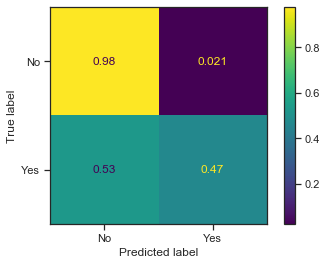

In [153]:
# plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_cv,X_test,y_test,normalize='true')

Conclusion: KNN is not a good method with <50% sensitivity.

<h4> 2. Logistic regression

In [195]:
import warnings
warnings. filterwarnings('ignore')

In [196]:
# Use GridSearchCV to choose hyperparameter for logistic regression
# Do hyperparameter tuning on training set
from sklearn.linear_model import LogisticRegression
# Create the hyperparameter grid
c_space = np.logspace(0.1, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}
# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression(solver='liblinear',random_state=21)
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=21,stratify=y)
# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid,cv=5)
# Fit it to the training data
logreg_cv.fit(X_train,y_train)
# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 1.2589254117941673, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.9353074035475405


In [197]:
y_pred=logreg_cv.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          No       0.98      0.95      0.96      1529
         Yes       0.46      0.74      0.57        94

    accuracy                           0.93      1623
   macro avg       0.72      0.85      0.77      1623
weighted avg       0.95      0.93      0.94      1623



In [198]:
print(confusion_matrix(y_pred,y_test))

[[1447   82]
 [  24   70]]


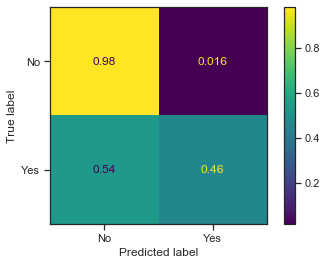

In [199]:
plot_confusion_matrix(logreg_cv,X_test,y_test,normalize='true')

Conclusion: logistic regression is not a good method with <50% sensitivity, but oversampling the positive cases may help. 

<h4> 3. Logistic regression with oversampler

In [200]:
# Use oversampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[('No', 3433), ('Yes', 3433)]


In [201]:
# Fit logistic regression to the over-sampled data
logreg_cv_r = GridSearchCV(logreg,param_grid,cv=5)
logreg_cv_r.fit(X_resampled,y_resampled)
# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv_r.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv_r.best_score_))

Tuned Logistic Regression Parameter: {'C': 1.2589254117941673, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.8584317429825148


In [202]:
y_pred=logreg_cv_r.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          No       0.91      0.98      0.94      1369
         Yes       0.78      0.47      0.59       254

    accuracy                           0.90      1623
   macro avg       0.85      0.72      0.76      1623
weighted avg       0.89      0.90      0.89      1623



In [203]:
print(confusion_matrix(y_pred,y_test))

[[1336   33]
 [ 135  119]]


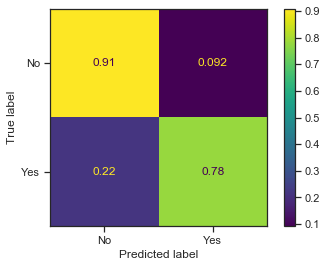

In [204]:
plot_confusion_matrix(logreg_cv_r,X_test,y_test,normalize='true')

In [205]:
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import sensitivity_specificity_support, sensitivity_score, specificity_score
print(balanced_accuracy_score(y_test, y_pred))
print(sensitivity_specificity_support(y_test,y_pred))

0.8455602168234999
(array([0.9082257 , 0.78289474]), array([0.78289474, 0.9082257 ]), array([1471,  152]))


Conclusion: logistic regression with oversampling the positive cases have dramatically improved the accuracy with sensitivity of 78% sensitivity and 91% specificity.

<h4> 4. Random Forest

In [185]:
# Try Gridsearch on original imbalanced sampling
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
param_grid = {'n_estimators': np.arange(50, 100)}
model=RandomForestClassifier(random_state=21)
rf_cv = GridSearchCV(model, param_grid, cv=5)
rf_cv.fit(X_train, y_train)
rf_cv.best_params_
rf_cv.score(X_test,y_test)
y_pred=rf_cv.predict(X_test)

In [189]:
rf_cv.best_params_

{'n_estimators': 51}

In [186]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          No       0.97      0.95      0.96      1502
         Yes       0.49      0.61      0.54       121

    accuracy                           0.92      1623
   macro avg       0.73      0.78      0.75      1623
weighted avg       0.93      0.92      0.93      1623



In [187]:
print(confusion_matrix(y_pred,y_test))

[[1424   78]
 [  47   74]]


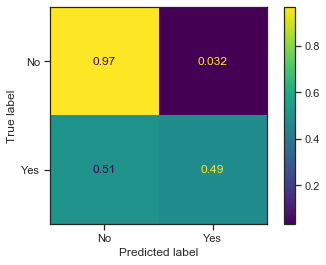

In [188]:
plot_confusion_matrix(rf_cv,X_test,y_test,normalize='true')

Conclusion: random forests is not working very well on the imbalanced data. 

<h4> 5. Random forest with balanced sampling

In [25]:
from imblearn.ensemble import BalancedRandomForestClassifier
param_grid = {'n_estimators': np.arange(50, 100)}
brf = BalancedRandomForestClassifier(random_state=21)
brf_cv = GridSearchCV(brf, param_grid, cv=5)
brf_cv.fit(X_train, y_train)
brf_cv.best_params_

{'n_estimators': 81}

In [26]:
y_pred = brf_cv.predict(X_test)
print(balanced_accuracy_score(y_test, y_pred))

0.8536530824000859


In [27]:
print(sensitivity_specificity_support(y_test,y_pred))

(array([0.83888511, 0.86842105]), array([0.86842105, 0.83888511]), array([1471,  152]))


In [28]:
print(confusion_matrix(y_pred,y_test))

[[1234   20]
 [ 237  132]]


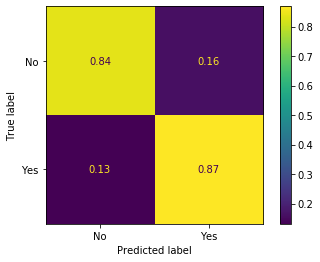

In [36]:
plot_confusion_matrix(brf_cv,X_test,y_test,normalize='true')

Random forest with balanced data improved the performance to 87% sensitivity and 84% specificity. 

<h4> 6. Balanced Bagging

In [37]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(), sampling_strategy='auto', replacement=False,
                               random_state=21)
bbc.fit(X_train, y_train) 
y_pred = bbc.predict(X_test)
balanced_accuracy_score(y_test, y_pred)  

0.8247052667358403

In [38]:
print(sensitivity_specificity_support(y_test,y_pred))

(array([0.87967369, 0.76973684]), array([0.76973684, 0.87967369]), array([1471,  152]))


In [39]:
print(confusion_matrix(y_pred,y_test))

[[1294   35]
 [ 177  117]]


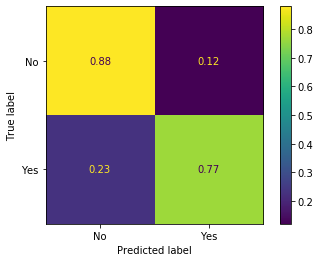

In [40]:
plot_confusion_matrix(bbc,X_test,y_test,normalize='true')

Balanced bagging is not the best method with 77% sensitivity and 88% specificity. 

<h4> 7. Boosting: Adaboosting

In [41]:
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=21)
eec.fit(X_train, y_train) 
y_pred = eec.predict(X_test)
balanced_accuracy_score(y_test, y_pred)  

0.8561419907689005

In [42]:
print(confusion_matrix(y_pred,y_test))

[[1251   21]
 [ 220  131]]


In [43]:
print(sensitivity_specificity_support(y_test,y_pred))

(array([0.85044188, 0.86184211]), array([0.86184211, 0.85044188]), array([1471,  152]))


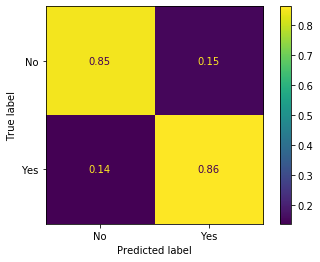

In [44]:
plot_confusion_matrix(eec,X_test,y_test,normalize='true')

Adaboosting has the 86% sensitivity and 85% specificity. 

<h4> 8. Boosting: Rusboosting

In [45]:
# Use GridSearchCV to choose hyperparameter for Rusboosting, n_neighbors
# Do hyperparameter tuning on training set
from imblearn.ensemble import RUSBoostClassifier
param_grid = {'n_estimators': np.arange(50, 100)}
rusboost = RUSBoostClassifier(algorithm='SAMME.R',random_state=21)
rusboost_cv = GridSearchCV(rusboost, param_grid, cv=5)
rusboost_cv.fit(X_train, y_train)
rusboost_cv.best_params_

{'n_estimators': 73}

In [46]:
y_pred = rusboost_cv.predict(X_test)
print(balanced_accuracy_score(y_test, y_pred))  
print(confusion_matrix(y_pred,y_test))

0.8423154674585853
[[1220   22]
 [ 251  130]]


In [47]:
print(sensitivity_specificity_support(y_test,y_pred))

(array([0.82936778, 0.85526316]), array([0.85526316, 0.82936778]), array([1471,  152]))


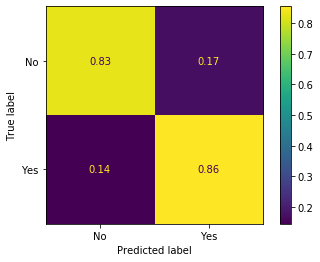

In [48]:
plot_confusion_matrix(rusboost_cv,X_test,y_test,normalize='true')

Rusboosting has 86% sensitivity and 83% specificity. 

<h3> Calculating the fraudulent claims recovered from the identified providers

In [61]:
#Calculate predicted labels using balanced random forest
y_pred = brf_cv.predict(X_test)

In [99]:
#Assemble the test dataset with added column for the predicted label
d = {'Predicted':y_pred,'True':y_test}
df1=pd.DataFrame(d)
df2=pd.DataFrame(X_test)
df=pd.concat([df1,df2], axis=1, ignore_index=False)
df.columns = ['Predicted Label','True Label','In_Claim_Number','Out_Claim_Number','In_Claim_Amount','Out_Claim_Amount']

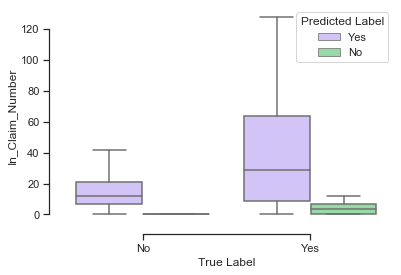

In [108]:
#Boxplot compare inpatient claim numbers between true positive, true negative, false positive and false negatives
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="True Label", y=df.iloc[:,2],
            hue="Predicted Label", palette=["m", "g"],
            data=df,showfliers=False)
sns.despine(offset=10, trim=True)

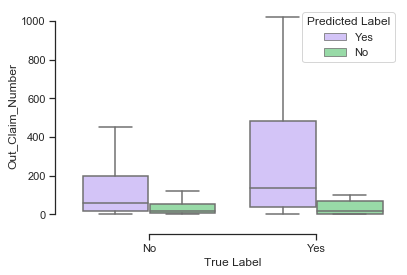

In [107]:
#Boxplot compare outpatient claim numbers between true positive, true negative, false positive and false negatives
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="True Label", y=df.iloc[:,3],
            hue="Predicted Label", palette=["m", "g"],
            data=df,showfliers=False)
sns.despine(offset=10, trim=True)

Text(0.5, 1.0, 'Outpatient Claim Amount')

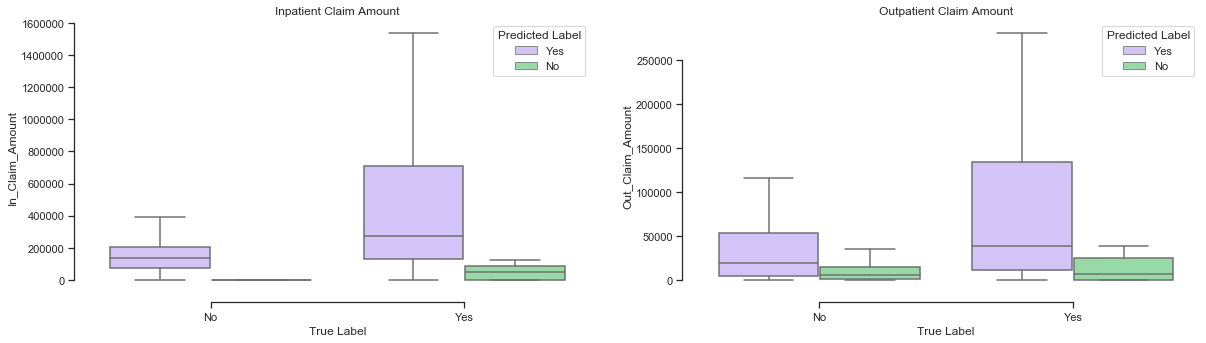

In [110]:
#Boxplot compare inpatient/outpatient claim amounts between true positive, true negative, false positive and false negatives
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="True Label", y=df.iloc[:,4],
            hue="Predicted Label", palette=["m", "g"],
            data=df,showfliers=False,)
sns.despine(offset=10, trim=True)
plt.title("Inpatient Claim Amount")
plt.subplot(1,2,2)
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="True Label", y=df.iloc[:,5],
            hue="Predicted Label", palette=["m", "g"],
            data=df,showfliers=False)
sns.despine(offset=10, trim=True)
plt.title("Outpatient Claim Amount")

In [111]:
#Total outpatient claim amounts for true positive, true negative, false positive and false negatives
df.groupby(['True Label','Predicted Label'])['Out_Claim_Amount'].sum()

True Label  Predicted Label
No          No                 15807740
            Yes                11191510
Yes         No                   493760
            Yes                18118130
Name: Out_Claim_Amount, dtype: int64

In [112]:
#Median outpatient claim amounts for true positive, true negative, false positive and false negatives
df.groupby(['True Label','Predicted Label'])['Out_Claim_Amount'].median()

True Label  Predicted Label
No          No                  5110
            Yes                18700
Yes         No                  6195
            Yes                38480
Name: Out_Claim_Amount, dtype: int64

In [113]:
#Mean outpatient claim amounts for true positive, true negative, false positive and false negatives
df.groupby(['True Label','Predicted Label'])['Out_Claim_Amount'].mean()

True Label  Predicted Label
No          No                  12810.162075
            Yes                 47221.561181
Yes         No                  24688.000000
            Yes                137258.560606
Name: Out_Claim_Amount, dtype: float64

In [114]:
#Total inpatient claim amounts for true positive, true negative, false positive and false negatives
df.groupby(['True Label','Predicted Label'])['In_Claim_Amount'].sum()

True Label  Predicted Label
No          No                 11028050
            Yes                43157280
Yes         No                  1001800
            Yes                64041190
Name: In_Claim_Amount, dtype: int64

In [115]:
#Median inpatient claim amounts for true positive, true negative, false positive and false negatives
df.groupby(['True Label','Predicted Label'])['In_Claim_Amount'].median()

True Label  Predicted Label
No          No                      0
            Yes                135000
Yes         No                  51900
            Yes                276200
Name: In_Claim_Amount, dtype: int64

In [116]:
#Mean inpatient claim amounts for true positive, true negative, false positive and false negatives
df.groupby(['True Label','Predicted Label'])['In_Claim_Amount'].mean()

True Label  Predicted Label
No          No                   8936.831442
            Yes                182098.227848
Yes         No                  50090.000000
            Yes                485160.530303
Name: In_Claim_Amount, dtype: float64

Text(0.5, 1.0, 'Outpatient Claim Amount')

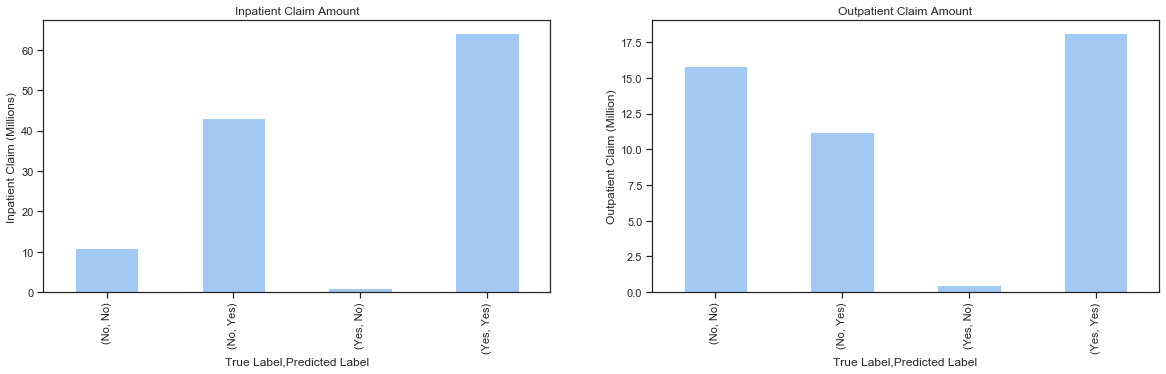

In [148]:
#Barplots for total inpatient/outpatient claim amounts for true positive, true negative, false positive and false negatives
ti=df.groupby(['True Label','Predicted Label'])['In_Claim_Amount'].sum()/1000000
to=df.groupby(['True Label','Predicted Label'])['Out_Claim_Amount'].sum()/1000000
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
ti.plot(kind="bar")
plt.ylabel("Inpatient Claim (Millions)")
plt.title("Inpatient Claim Amount")
plt.subplot(1,2,2)
to.plot(kind="bar")
plt.ylabel("Outpatient Claim (Million)")
plt.title("Outpatient Claim Amount")
